<a href="https://colab.research.google.com/github/fazalmittu/StockPricePredictor/blob/main/StockPricePredictorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TODO: Find Dataset, then import it and make it usable to train the model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
import requests

csv_url = "https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1583106669&period2=1614642669&interval=1d&events=history&includeAdjustedClose=true"

print(csv_url)

req = requests.get(csv_url)
url_content = req.content
csv_file = open('AAPL.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

dataset = pd.read_csv('AAPL.csv')

#print(dataset)


https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1583106669&period2=1614642669&interval=1d&events=history&includeAdjustedClose=true


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset.index = dataset['Date']

#plt.figure(figsize=(16,8))
#plt.plot(dataset['Volume'], label='Amount of Stocks')

In [ ]:
dataset = dataset.sort_index(ascending=True, axis=0)
dataset2 = pd.DataFrame(index=range(0,len(dataset)),columns=['Date', 'Close'])
for i in range(0,len(dataset)):
    dataset2['Date'][i] = dataset['Date'][i]
    dataset2['Close'][i] = dataset['Close'][i]

In [ ]:
dataset2.index = dataset2.Date
dataset2.drop('Date', axis=1, inplace = True)

In [ ]:
dataset3 = dataset2.values 

In [ ]:

train = dataset3[0:200, :]
valid = dataset3[200:, :]
#print(valid)

In [ ]:
# puts everything between (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset3)
#print(scaled_data)

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM( units=1000, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=1000))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

140/140 - 276s - loss: 0.0219


In [ ]:
inputs = dataset3[len(dataset3) - len(valid) - 60:]
inputs = inputs.reshape(-1, 1)
inputs  = scaler.transform(inputs)
print(inputs.shape)

(112, 1)


In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
#print(X_test.shape)

GRAPH:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


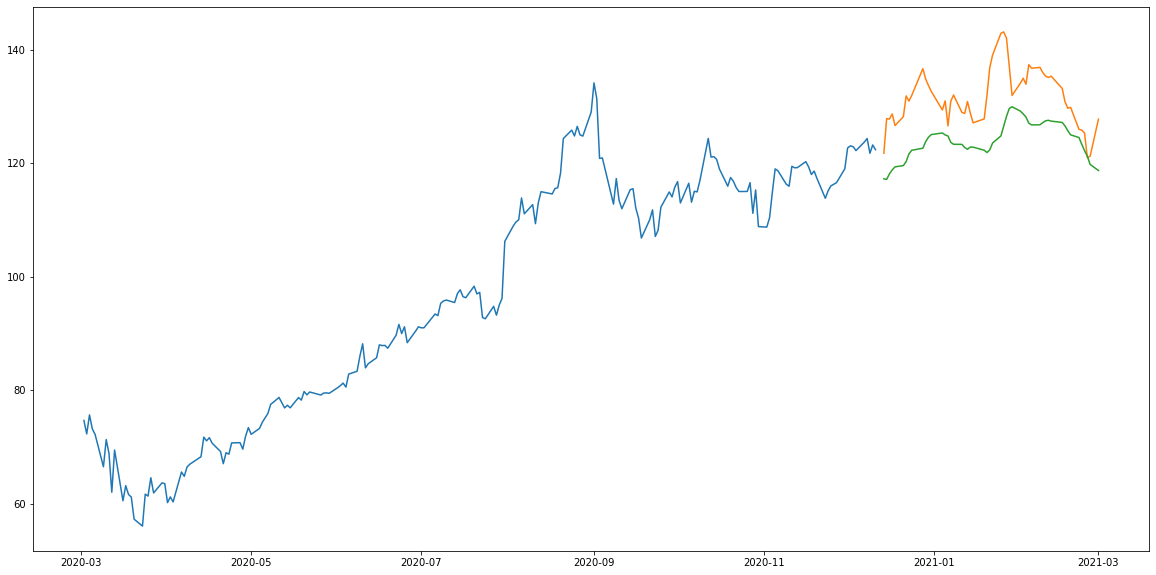

In [ ]:

train = dataset2[:200]
valid = dataset2[200:]
valid['Predictions'] = closing_price
plt.figure(figsize=(20,10))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])